### DATA EXPLORATION

Cargamos las librerías necesarias y el dataset 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

#plt.style.use('bmh')

In [2]:
df = pd.read_csv('tfm_fraude_I_tramas.csv', low_memory=False, index_col = 'ref')
df.head()

,V213,V208,V205,V206,V209,V183,V203,V191,V212,V210,...,X5,X6,X17,X21,X18,X19,X20,X10,X15,y
ref,,,,,,,,,,,,,,,,,,,,,
201390679,0,1,1,1,WEB,014,0.0,7.0,199.0,CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
201390959,0,1,1,1,WEB,ESPA,0.0,4.0,688.0,DI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
201397626,11,1,1,1,AGG,ESPA,0.0,11.0,1140.0,SO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
201397742,11,1,1,1,WEB,ESPA,99.0,8.0,872.0,CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
201401345,12,1,1,1,AGG,ESPA,0.0,8.0,1143.0,CO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Tenemos que eliminar las variables: **X5**, **X6**, **X15**, **X10** y **V162**

In [3]:
df.drop(['X5', 'X6', 'X15', 'X10', 'V162'], axis=1, inplace=True)

### *EDA(Análisis exploratorio de los datos)*

In [4]:
# Shape of the dataframe
df.shape

(103914, 118)

Tenemos un dataframe de 103914 registros y 124 columnas, la primera **ref** es el código de referencia. Tenemos por tanto 123 variables contando con la variable respuesta. La variable respuesta **y** es de tipo binaria, con 1 hay indicio de fraude y con 0 no.

In [5]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103914 entries, 201390679 to 237853635
Data columns (total 118 columns):
V213    103914 non-null int64
V208    103914 non-null int64
V205    103914 non-null int64
V206    103914 non-null int64
V209    103914 non-null object
V183    103910 non-null object
V203    103910 non-null float64
V191    103910 non-null float64
V212    103910 non-null float64
V210    103910 non-null object
V202    103910 non-null float64
V187    32668 non-null float64
V185    103908 non-null float64
V186    32664 non-null float64
V175    103909 non-null object
V176    31876 non-null object
V198    79351 non-null object
V179    103914 non-null int64
V180    32668 non-null float64
V190    103910 non-null object
V242    103910 non-null float64
V167    103910 non-null float64
V189    32668 non-null float64
V188    103910 non-null float64
V243    96756 non-null float64
V193    103910 non-null object
V196    103910 non-null float64
V182    103910 non-null float64
V245  

In [6]:
pd.value_counts(df.dtypes)

float64    62
int64      33
object     23
dtype: int64

Miremos a nuestra variable respuesta **y**

In [7]:
print(df['y'].describe())

count    103914.000000
mean          0.011654
std           0.107323
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: y, dtype: float64


In [8]:
print('No Fraude', round(df['y'].value_counts()[0]/len(df) * 100,2), '% del dataset')
print('Fraude', round(df['y'].value_counts()[1]/len(df) * 100,2), '% del dataset')


No Fraude 98.83 % del dataset
Fraude 1.17 % del dataset


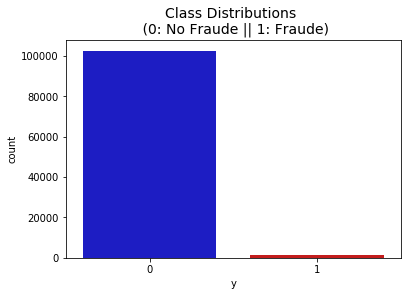

In [9]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('y', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraude || 1: Fraude)', fontsize=14)

Está claramete desbalanceado. Aplicaremos técnicas de balanceo de los datos.

Identificación de NAN

In [10]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 118 columns.
There are 77 columns that have missing values.


,Missing Values,% of Total Values
X19,103857,99.9
X20,103796,99.9
X2,79851,76.8
X17,79851,76.8
X1,79851,76.8
X3,79851,76.8
X4,79851,76.8
X12,79848,76.8
X14,79848,76.8
X13,79848,76.8


Podemos observar que algunas variables tienen casi tosos sus valores como NaN. Veremos como imputar los valores perdidos.

In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])


In [13]:
#df_num.drop('ref', axis=1, inplace=True)
df_num.head()

,V213,V208,V205,V206,V203,V191,V212,V202,V187,V185,...,X11,X1,X3,X2,X17,X21,X18,X19,X20,y
ref,,,,,,,,,,,,,,,,,,,,,
201390679,0,1,1,1,0.0,7.0,199.0,27.0,NaN,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
201390959,0,1,1,1,0.0,4.0,688.0,47.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
201397626,11,1,1,1,0.0,11.0,1140.0,36.0,NaN,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
201397742,11,1,1,1,99.0,8.0,872.0,25.0,NaN,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
201401345,12,1,1,1,0.0,8.0,1143.0,33.0,28.0,181.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x062A5670>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0EB64C50>]], dtype=object)

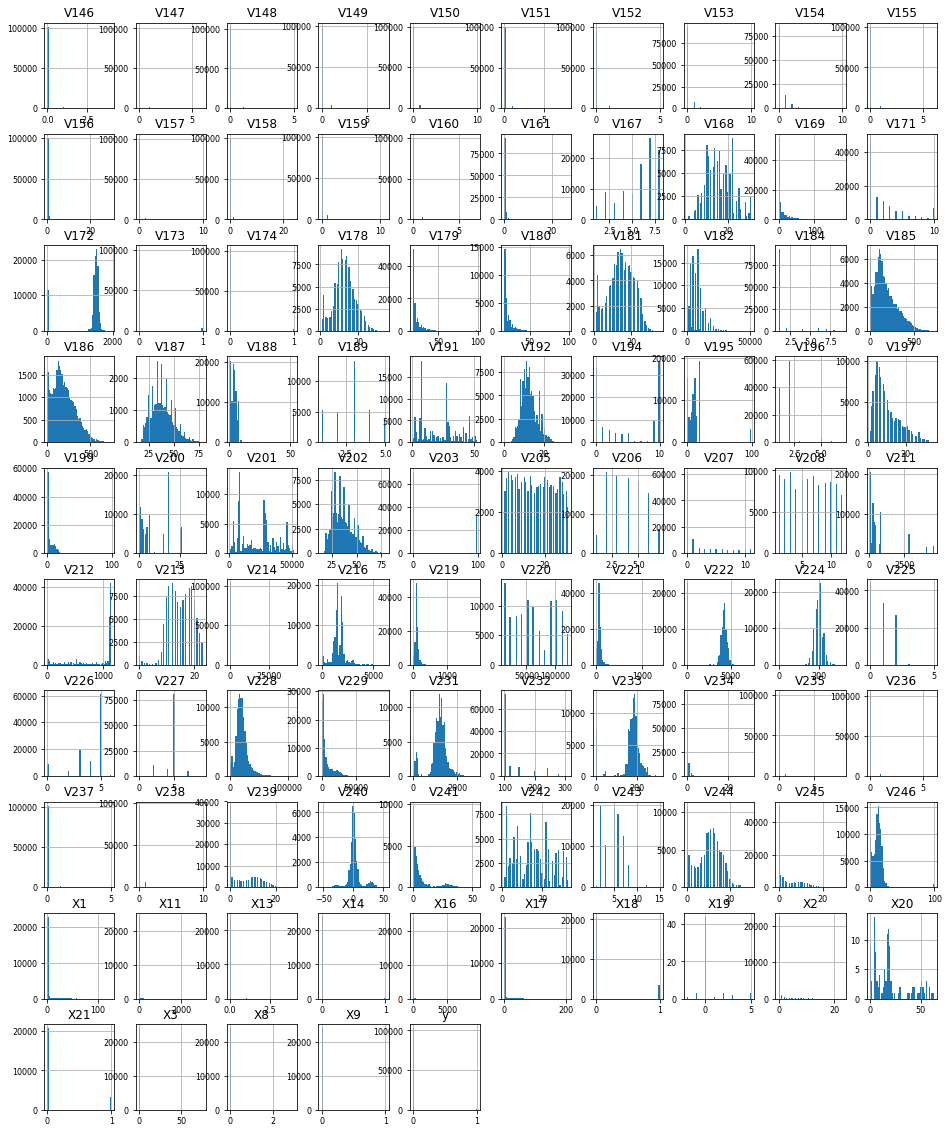

In [14]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [15]:
def plot_corr(df,size=10): 
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe. 

    Input: 
     df: pandas DataFrame 
     size: vertical and horizontal size of the plot''' 

    corr = df.corr() 
    fig, ax = plt.subplots(figsize=(size, size)) 
    ax.matshow(corr) 
    plt.xticks(range(len(corr.columns)), corr.columns); 
    plt.yticks(range(len(corr.columns)), corr.columns);

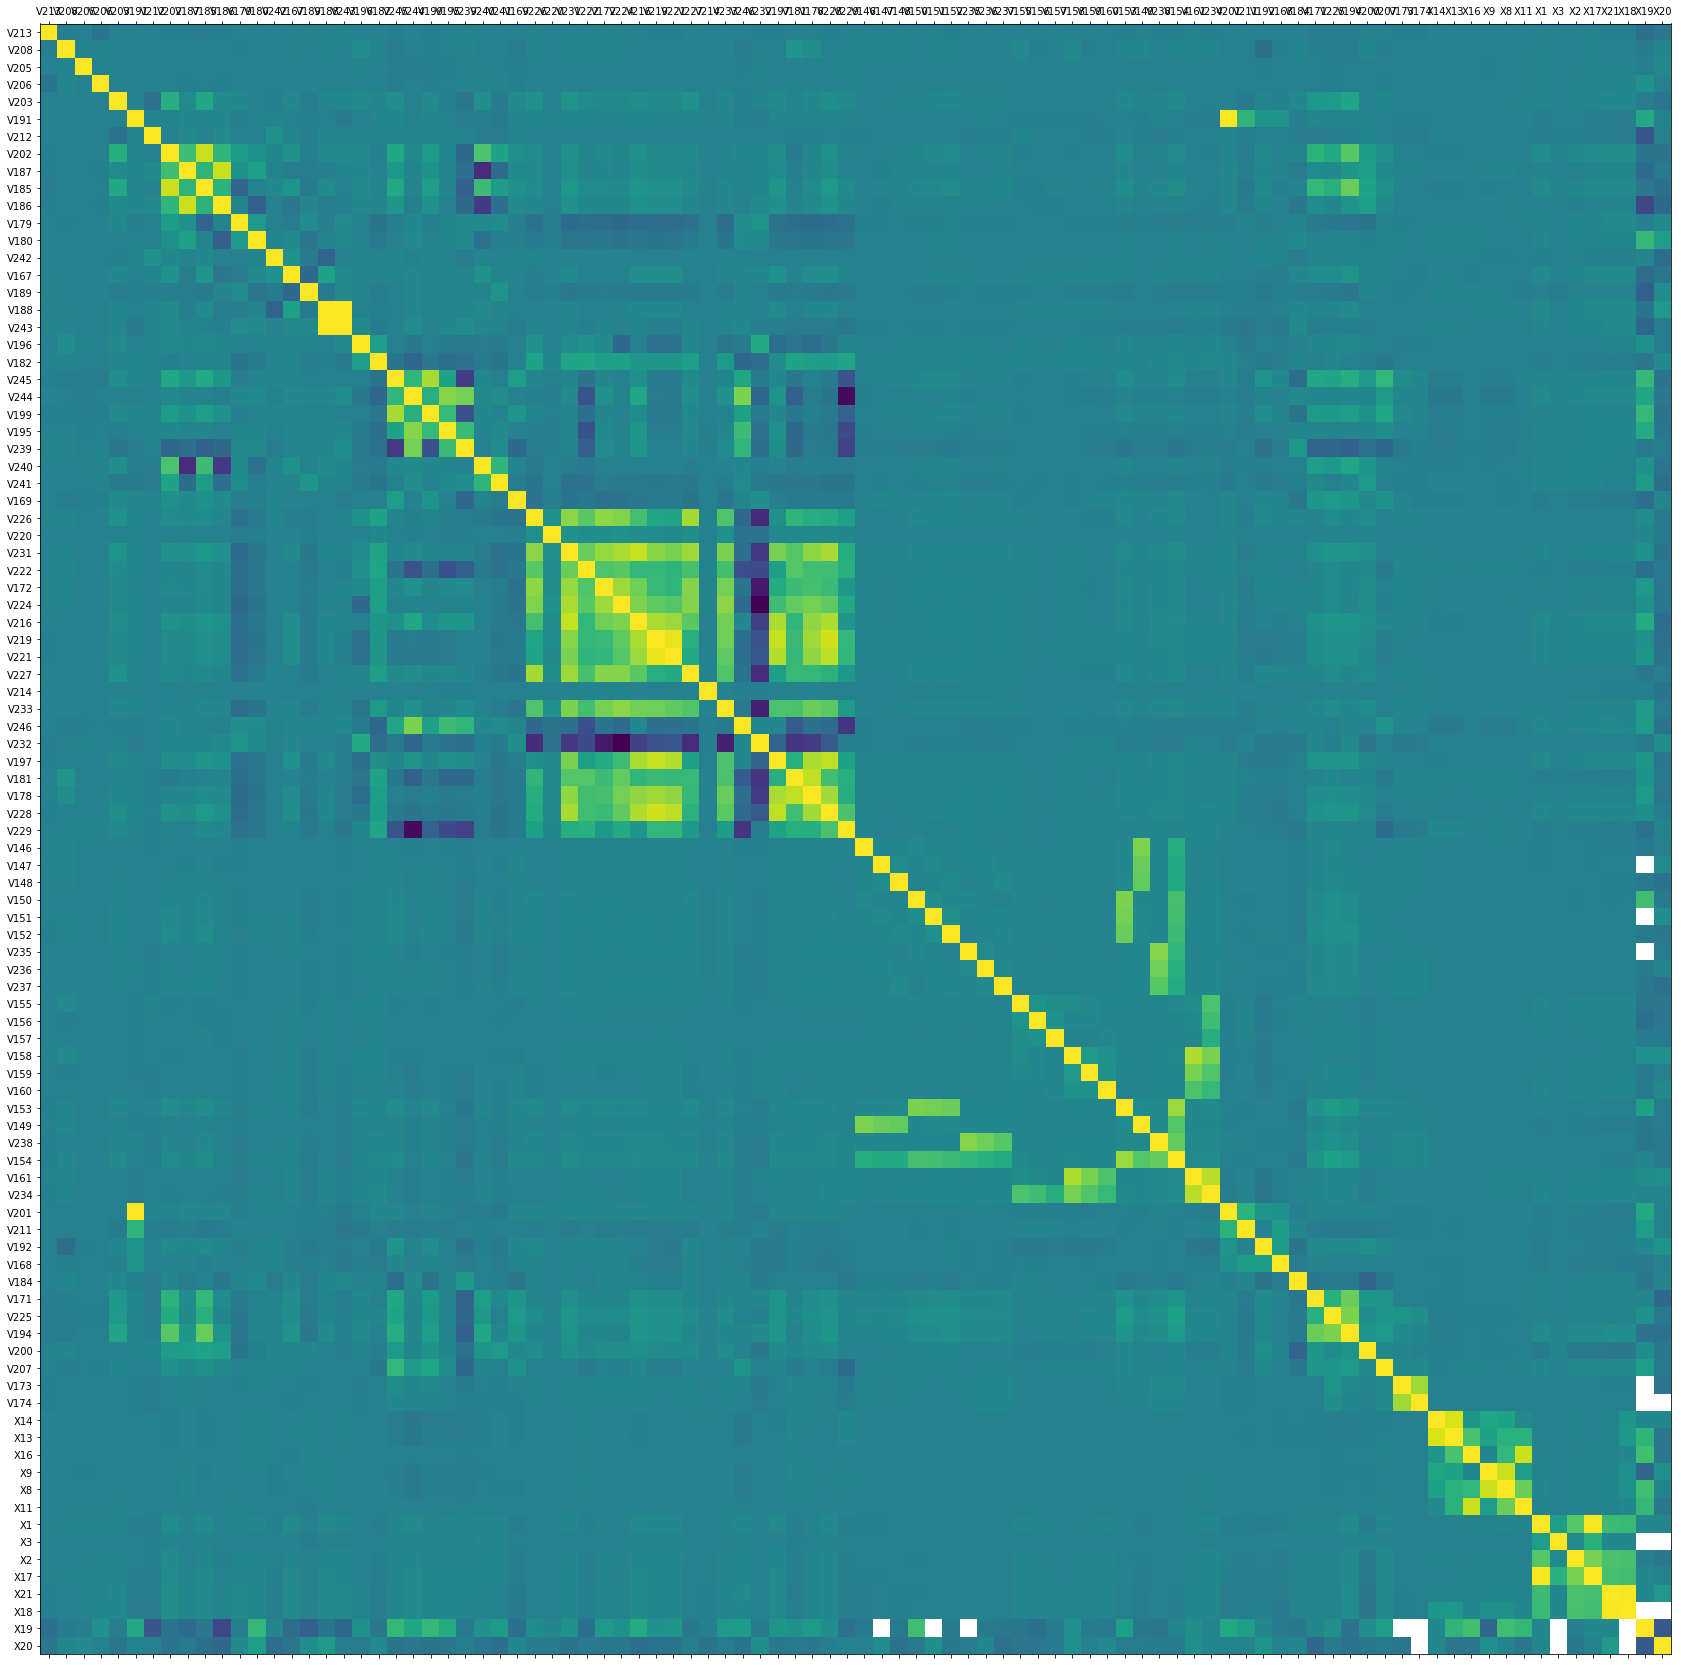

In [16]:
plot_corr(df_num.drop('y', axis=1), size=30)

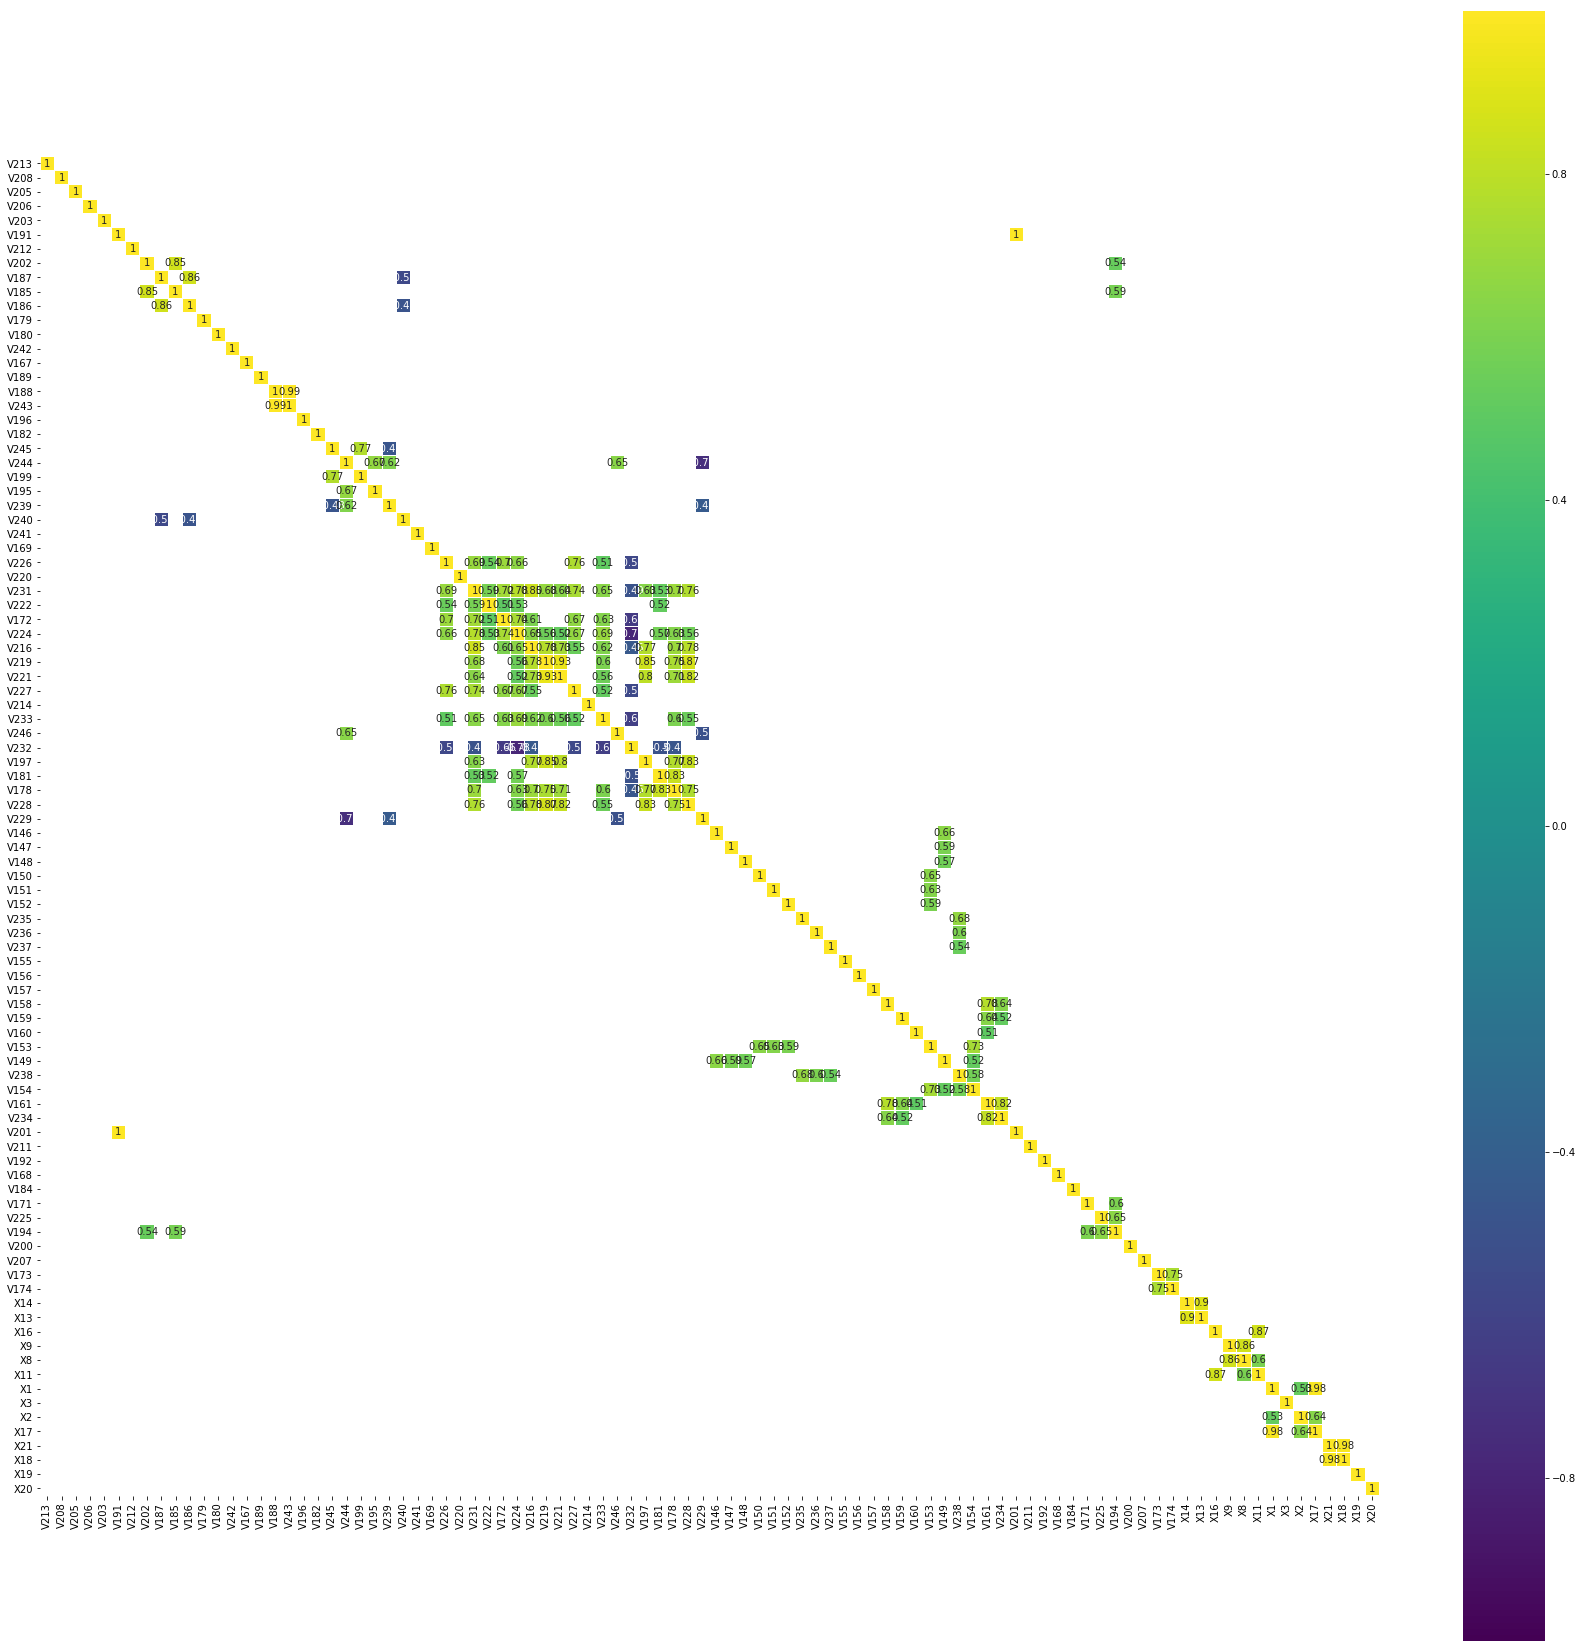

In [17]:
corr = df_num.drop('y', axis=1).corr() 
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True)

In [18]:
corr.style.background_gradient()

C:\Users\Isaac\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


Summary

In [19]:
df_fl64 = df.loc[:, df.dtypes == np.float64]
col_fl = df_fl64.columns.values.tolist()
df_fl64.head()

,V203,V191,V212,V202,V187,V185,V186,V180,V242,V167,...,X8,X11,X1,X3,X2,X17,X21,X18,X19,X20
ref,,,,,,,,,,,,,,,,,,,,,
201390679,0.0,7.0,199.0,27.0,NaN,113.0,NaN,NaN,15.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201390959,0.0,4.0,688.0,47.0,NaN,1.0,NaN,NaN,32.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201397626,0.0,11.0,1140.0,36.0,NaN,130.0,NaN,NaN,32.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201397742,99.0,8.0,872.0,25.0,NaN,69.0,NaN,NaN,28.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201401345,0.0,8.0,1143.0,33.0,28.0,181.0,110.0,19.0,18.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_fl64.describe()

,V203,V191,V212,V202,V187,V185,V186,V180,V242,V167,...,X8,X11,X1,X3,X2,X17,X21,X18,X19,X20
count,103910.000000,103910.000000,103910.000000,103910.000000,32668.000000,103908.000000,32664.000000,32668.000000,103910.000000,103910.000000,...,24066.000000,24066.000000,24063.000000,24063.000000,24063.000000,24063.000000,24066.000000,24066.000000,57.000000,118.000000
mean,31.468299,22.255615,905.899317,36.741430,38.217124,178.231686,194.409748,22.272989,15.345424,5.722847,...,0.002452,0.446232,0.675685,0.012176,0.151976,0.839837,0.138245,0.142940,0.403509,19.762712
std,46.099113,14.366562,363.768444,10.779207,10.678011,126.621103,127.251249,6.319838,8.967539,2.092486,...,0.051913,22.331245,3.865105,0.660316,0.774651,4.510089,0.345164,0.350019,1.360930,17.083344
min,0.000000,1.000000,1.000000,15.000000,15.000000,0.000000,0.000000,18.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,0.000000,8.000000,700.000000,28.000000,31.000000,86.000000,100.000000,18.000000,8.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,23.000000,1117.000000,35.000000,37.000000,148.000000,175.000000,20.000000,15.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,99.000000,31.000000,1129.000000,44.000000,45.000000,253.000000,275.000000,24.000000,22.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
max,99.000000,52.000000,1146.000000,79.000000,79.000000,731.000000,742.000000,99.000000,33.000000,8.000000,...,3.000000,3016.540000,127.000000,75.000000,23.000000,208.000000,1.000000,1.000000,5.000000,63.000000


In [21]:
df_int = df.loc[:, df.dtypes == np.int64]
col_int = df_int.columns.values.tolist()
df_int.head()

,V213,V208,V205,V206,V179,V199,V195,V146,V147,V148,...,V149,V238,V154,V161,V234,V194,V207,V173,V174,y
ref,,,,,,,,,,,,,,,,,,,,,
201390679,0,1,1,1,18,13,13,0,0,0,...,0,1,1,0,0,4,6,0,0,0
201390959,0,1,1,1,47,0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201397626,11,1,1,1,25,0,12,0,0,0,...,0,0,0,0,1,5,0,0,0,0
201397742,11,1,1,1,20,0,14,0,0,0,...,0,0,0,0,0,0,1,0,0,0
201401345,12,1,1,1,18,11,11,0,0,0,...,0,0,0,0,0,10,9,0,0,0


In [22]:
df_int.iloc[:, :].describe()

,V213,V208,V205,V206,V179,V199,V195,V146,V147,V148,...,V149,V238,V154,V161,V234,V194,V207,V173,V174,y
count,103914.000000,103914.000000,103914.000000,103914.000000,103914.000000,103914.000000,103914.000000,103914.000000,103914.000000,103914.000000,...,103914.000000,103914.000000,103914.000000,103914.000000,103914.000000,103914.000000,103914.000000,103914.000000,103914.000000,103914.000000
mean,15.013848,6.317888,15.503282,3.922522,22.263853,4.204602,12.414997,0.023933,0.017495,0.015744,...,0.057172,0.077853,0.256145,0.153637,0.266586,5.013357,2.002714,0.030188,0.017053,0.011654
std,4.408379,3.423850,8.864014,1.639509,7.287039,8.637145,16.123745,0.167214,0.142301,0.138255,...,0.272908,0.323373,0.639733,0.558167,0.744216,4.456740,3.271945,0.171106,0.129468,0.107323
min,0.000000,1.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,8.000000,3.000000,18.000000,0.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,6.000000,15.000000,4.000000,20.000000,1.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,9.000000,23.000000,5.000000,24.000000,7.000000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,0.000000
max,23.000000,12.000000,31.000000,7.000000,99.000000,99.000000,99.000000,4.000000,6.000000,5.000000,...,7.000000,10.000000,10.000000,27.000000,31.000000,10.000000,11.000000,1.000000,1.000000,1.000000


In [23]:
df_obj = df.loc[:, df.dtypes == np.object]
col_obj = df_obj.columns.values.tolist()
df_obj.head()

,V209,V183,V210,V175,V176,V198,V190,V193,V204,V218,...,V215,V170,V177,V163,V164,V165,V166,X12,X7,X4
ref,,,,,,,,,,,,,,,,,,,,,
201390679,WEB,014,CO,S,NaN,IO,D,COCINERO,AREA RESIDENCIAL,G,...,LANCIA,E0169,SI,COTIUNICA,COTIUNICA,COTIUNICA,COTIUNICA,NaN,NaN,NaN
201390959,WEB,ESPA,DI,N,NaN,IO,A,EMPLEADO TECNICO TECNICO DE LA,COM CON VIGILANCIA,D,...,RENAULT,SINA,NO,COTIUNICA,COTIUNICA,COTIUNICA,COTIUNICA,NaN,NaN,NaN
201397626,AGG,ESPA,SO,N,NaN,IO,A,EMPLEADO TECNICO TECNICO DE LA,CALLE,D,...,FORD,SINA,NO,SQRSINMULTASYSINI,OTROS,OTROS,OTROS,NaN,NaN,NaN
201397742,WEB,ESPA,CA,N,NaN,IO,A,PROFESOR,COM SIN VIGILANCIA,G,...,PEUGEOT,SINA,NO,SQRSINMULTASYSINI,OTROS,OTROS,OTROS,NaN,NaN,NaN
201401345,AGG,ESPA,CO,S,S,IP,A,MANTENIMIENTO,GAR INDIVIDUAL,D,...,CITROEN,C0109,SI,SQRSINMULTASYSINI,OTROS,OTROS,OTROS,NaN,NaN,NaN


In [24]:
df_obj.describe()

,V209,V183,V210,V175,V176,V198,V190,V193,V204,V218,...,V215,V170,V177,V163,V164,V165,V166,X12,X7,X4
count,103914,103910,103910,103909,31876,79351,103910,103910,103914,103910,...,103910,103914,103914,103914,103914,103914,103914,24066,24066,24063
unique,3,110,8,2,2,4,5,104,8,8,...,138,82,2,5,5,3,4,2,2,2
top,AGG,ESPA,CA,S,S,IO,A,ADMINISTRATIVO,GAR INDIVIDUAL,D,...,RENAULT,SINA,NO,SQRSINMULTASYSINI,OTROS,OTROS,OTROS,N,N,N
freq,67062,92831,45231,52834,16358,46683,85626,8054,35570,55221,...,9516,46548,70337,50311,52447,55087,53306,23948,24009,23187


OUTLIERS

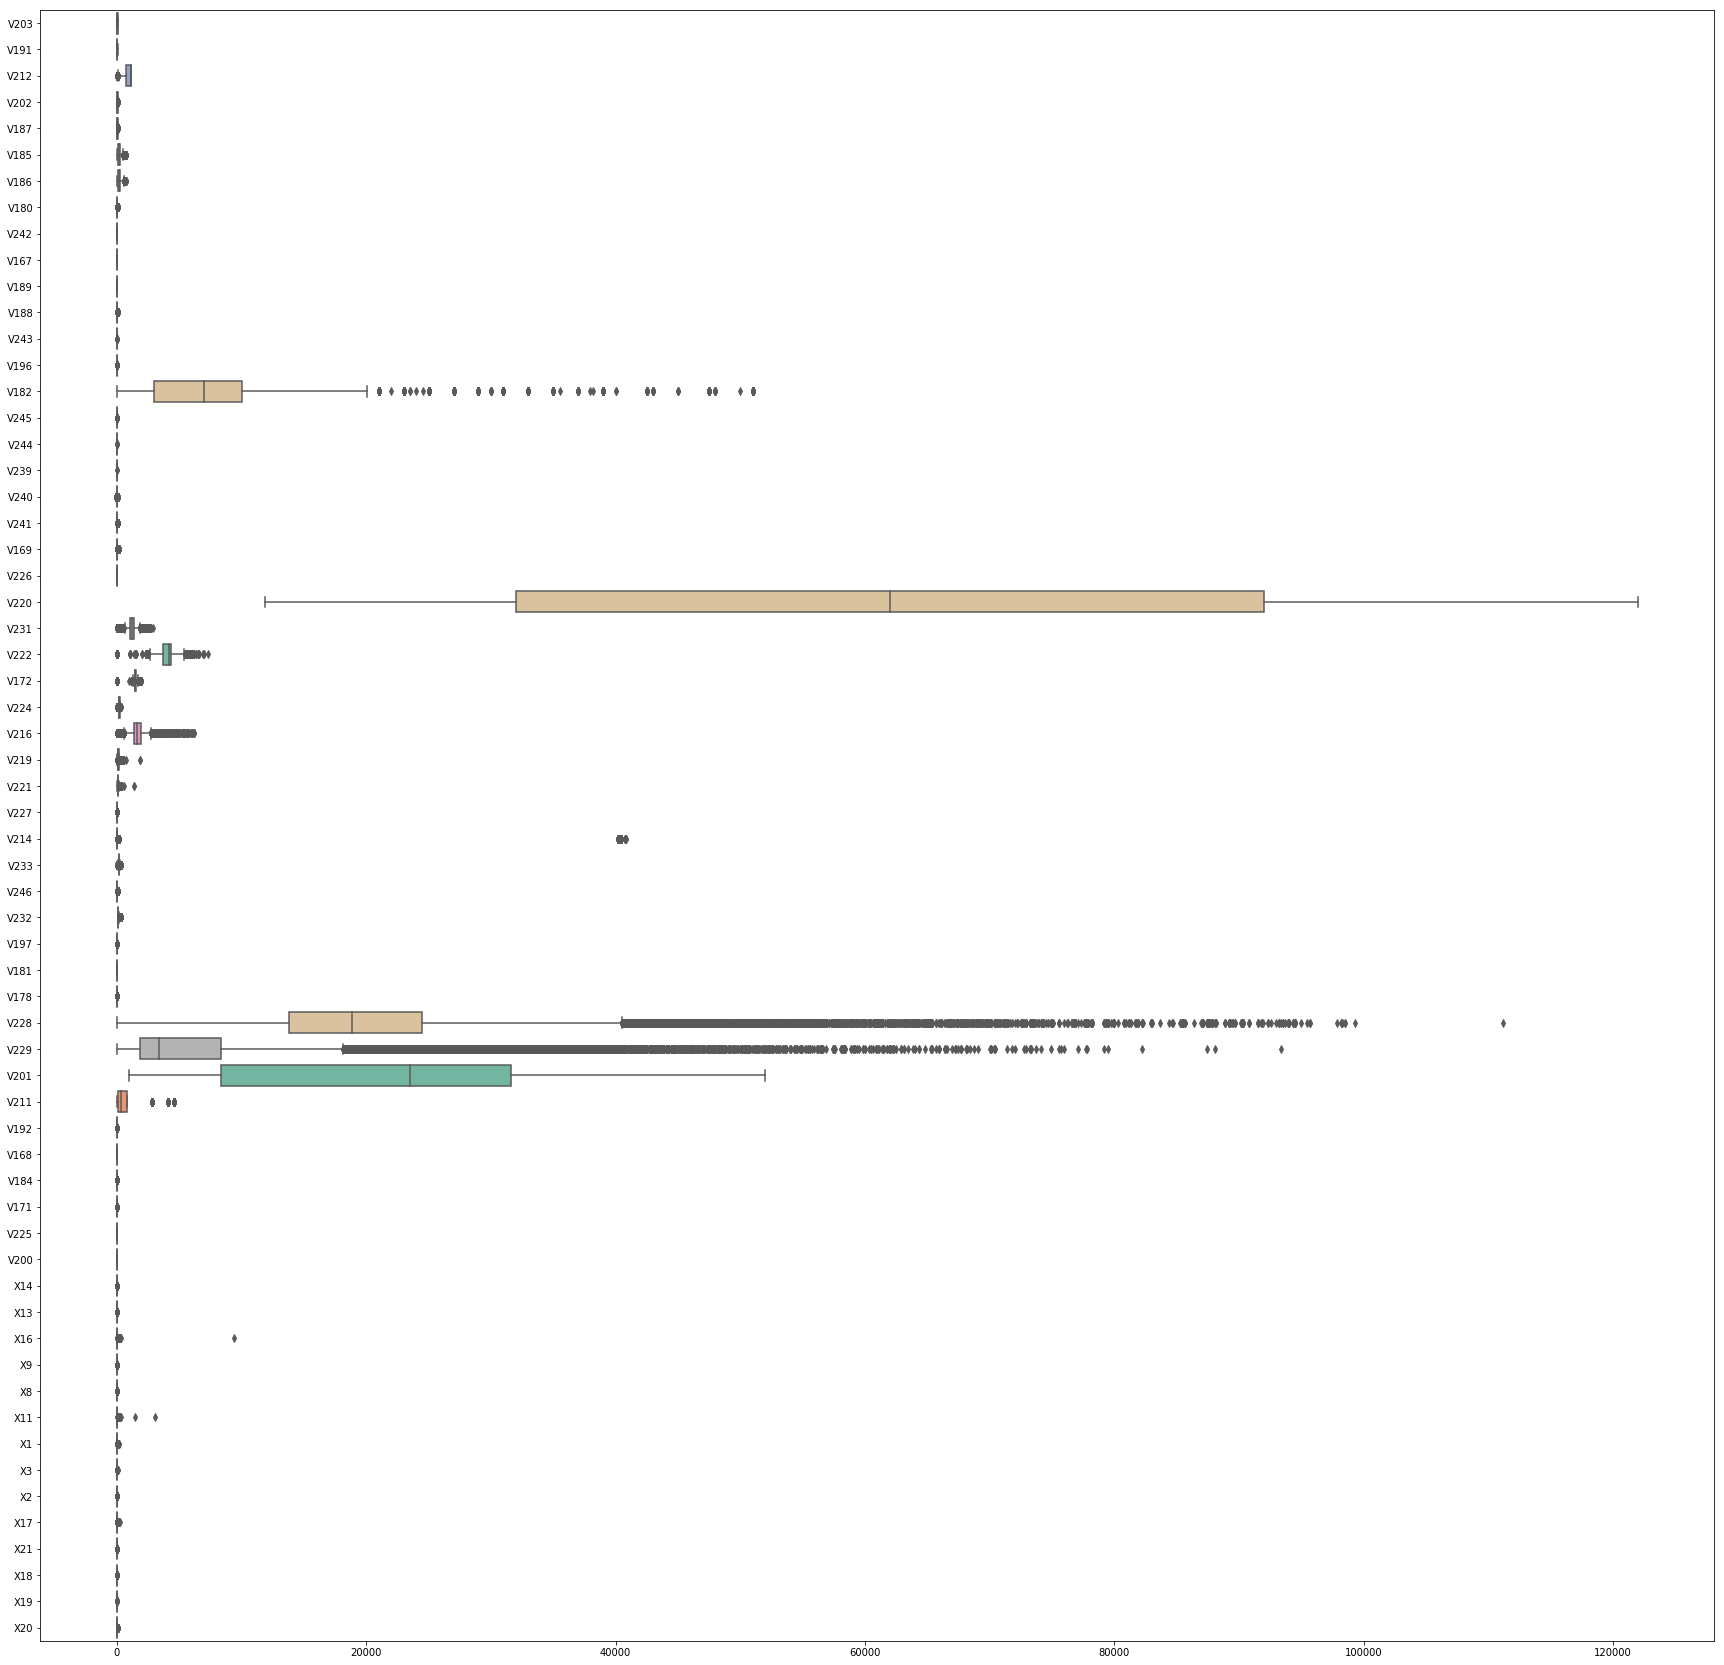

In [25]:
plt.figure(figsize=(30, 30))

ax = sns.boxplot(data=df[col_fl], orient="h", palette="Set2")

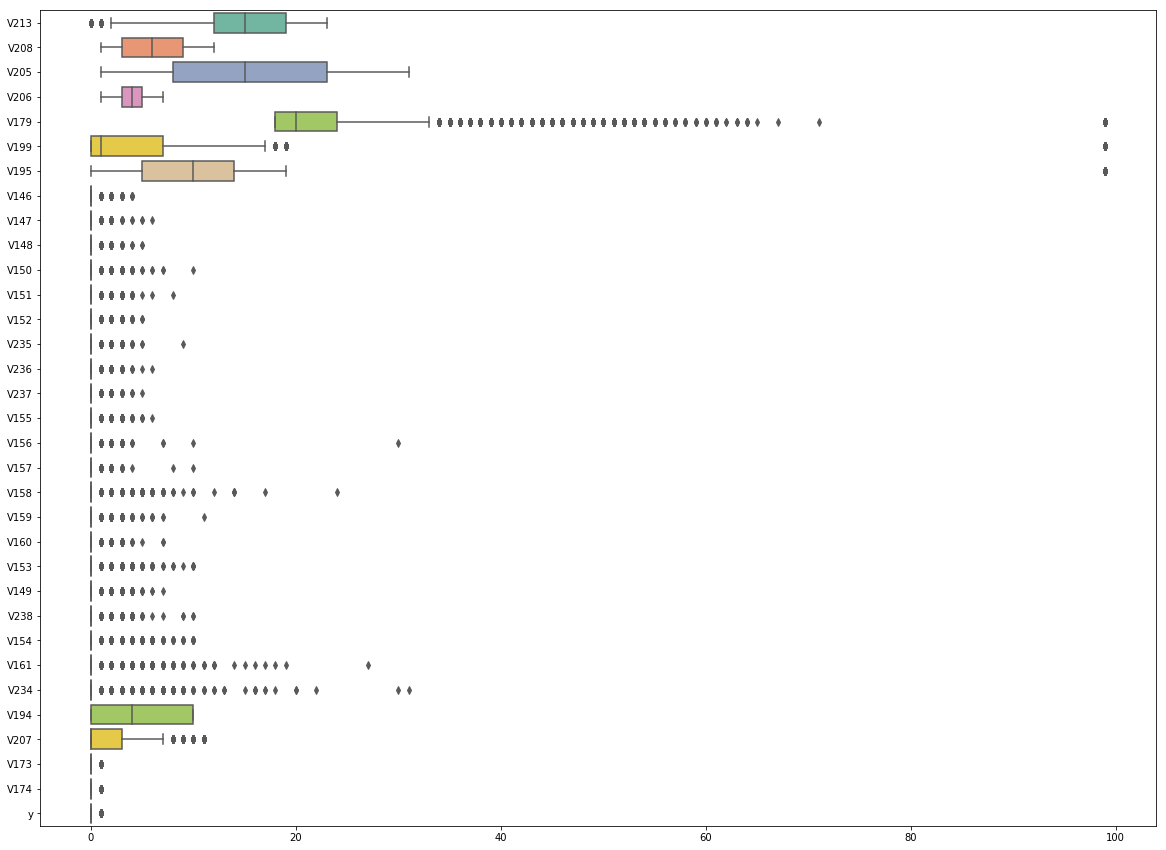

In [26]:
plt.figure(figsize=(20, 15))

ax2 = sns.boxplot(data=df[col_int], orient="h", palette="Set2")

### *Preprocesado*

In [27]:
missing_values

,Missing Values,% of Total Values
X19,103857,99.9
X20,103796,99.9
X2,79851,76.8
X17,79851,76.8
X1,79851,76.8
X3,79851,76.8
X4,79851,76.8
X12,79848,76.8
X14,79848,76.8
X13,79848,76.8


In [28]:
mode_dict = dict()
for c in col_obj:
    mode_dict[c] = df[c].mode().iloc[0]

In [29]:
mode_dict

{'V163': 'SQRSINMULTASYSINI',
 'V164': 'OTROS',
 'V165': 'OTROS',
 'V166': 'OTROS',
 'V170': 'SINA',
 'V175': 'S',
 'V176': 'S',
 'V177': 'NO',
 'V183': 'ESPA',
 'V190': 'A',
 'V193': 'ADMINISTRATIVO',
 'V198': 'IO',
 'V204': 'GAR INDIVIDUAL',
 'V209': 'AGG',
 'V210': 'CA',
 'V215': 'RENAULT',
 'V217': 'PO',
 'V218': 'D',
 'V223': 'IBIZA',
 'V230': 'S',
 'X12': 'N',
 'X4': 'N',
 'X7': 'N'}

In [30]:
mode_dict['V176'] = 'No dispone'
mode_dict['X12'] = 'No dispone'
mode_dict['X4'] = 'No dispone'
mode_dict['X7'] = 'No dispone'

mode_dict

{'V163': 'SQRSINMULTASYSINI',
 'V164': 'OTROS',
 'V165': 'OTROS',
 'V166': 'OTROS',
 'V170': 'SINA',
 'V175': 'S',
 'V176': 'No dispone',
 'V177': 'NO',
 'V183': 'ESPA',
 'V190': 'A',
 'V193': 'ADMINISTRATIVO',
 'V198': 'IO',
 'V204': 'GAR INDIVIDUAL',
 'V209': 'AGG',
 'V210': 'CA',
 'V215': 'RENAULT',
 'V217': 'PO',
 'V218': 'D',
 'V223': 'IBIZA',
 'V230': 'S',
 'X12': 'No dispone',
 'X4': 'No dispone',
 'X7': 'No dispone'}

In [31]:
df.fillna(mode_dict, inplace = True)

,V213,V208,V205,V206,V209,V183,V203,V191,V212,V210,...,X1,X3,X2,X4,X17,X21,X18,X19,X20,y
ref,,,,,,,,,,,,,,,,,,,,,
201390679,0,1,1,1,WEB,014,0.0,7.0,199.0,CO,...,NaN,NaN,NaN,No dispone,NaN,NaN,NaN,NaN,NaN,0
201390959,0,1,1,1,WEB,ESPA,0.0,4.0,688.0,DI,...,NaN,NaN,NaN,No dispone,NaN,NaN,NaN,NaN,NaN,0
201397626,11,1,1,1,AGG,ESPA,0.0,11.0,1140.0,SO,...,NaN,NaN,NaN,No dispone,NaN,NaN,NaN,NaN,NaN,0
201397742,11,1,1,1,WEB,ESPA,99.0,8.0,872.0,CA,...,NaN,NaN,NaN,No dispone,NaN,NaN,NaN,NaN,NaN,0
201401345,12,1,1,1,AGG,ESPA,0.0,8.0,1143.0,CO,...,NaN,NaN,NaN,No dispone,NaN,NaN,NaN,NaN,NaN,0
201402181,12,1,1,1,WEB,077,0.0,28.0,928.0,DI,...,NaN,NaN,NaN,No dispone,NaN,NaN,NaN,NaN,NaN,0
201403985,13,1,1,1,WEB,ESPA,0.0,28.0,355.0,CA,...,NaN,NaN,NaN,No dispone,NaN,NaN,NaN,NaN,NaN,0
201404213,13,1,1,1,AGG,ESPA,0.0,8.0,1132.0,CA,...,NaN,NaN,NaN,No dispone,NaN,NaN,NaN,NaN,NaN,0
201405542,13,1,1,1,WEB,ESPA,0.0,8.0,1045.0,SO,...,NaN,NaN,NaN,No dispone,NaN,NaN,NaN,NaN,NaN,0


In [32]:
df['X19'] = df.X19.abs()
df['V240'] = df.V240.abs()

In [33]:
median_dict = dict()
for c in col_fl:
   median_dict[c] =  df[c].median()

In [34]:
median_dict

{'V167': 6.0,
 'V168': 15.0,
 'V169': 3.0,
 'V171': 1.0,
 'V172': 1484.0,
 'V178': 13.0,
 'V180': 20.0,
 'V181': 15.0,
 'V182': 7000.0,
 'V184': 1.0,
 'V185': 148.0,
 'V186': 175.0,
 'V187': 37.0,
 'V188': 5.0,
 'V189': 3.0,
 'V191': 23.0,
 'V192': 12.24,
 'V196': 2.0,
 'V197': 8.0,
 'V200': 7.0,
 'V201': 23485.0,
 'V202': 35.0,
 'V203': 0.0,
 'V211': 311.0,
 'V212': 1117.0,
 'V214': 11.2,
 'V216': 1597.0,
 'V219': 101.0,
 'V220': 62000.0,
 'V221': 74.0,
 'V222': 4170.0,
 'V224': 195.0,
 'V225': 1.0,
 'V226': 5.0,
 'V227': 5.0,
 'V228': 18825.0,
 'V229': 3372.0,
 'V231': 1215.0,
 'V232': 100.0,
 'V233': 180.0,
 'V239': 4.0,
 'V240': 3.0,
 'V241': 3.0,
 'V242': 15.0,
 'V243': 5.0,
 'V244': 10.0,
 'V245': 1.0,
 'V246': 12.0,
 'X1': 0.0,
 'X11': 0.0,
 'X13': 0.0,
 'X14': 0.0,
 'X16': 0.0,
 'X17': 0.0,
 'X18': 0.0,
 'X19': 0.0,
 'X2': 0.0,
 'X20': 17.0,
 'X21': 0.0,
 'X3': 0.0,
 'X8': 0.0,
 'X9': 0.0}

In [35]:
median_dict['X11'] = 9999
median_dict['X16'] = 9999
median_dict['V187'] = 9999
median_dict['V186'] = 9999
median_dict['V180'] = 9999
median_dict['V189'] = 9999
median_dict['V240'] = 9999
median_dict['V241'] = 9999
median_dict['X14'] = 9999
median_dict['X13'] = 9999
median_dict['X9'] = 9999
median_dict['X8'] = 9999
median_dict['X1'] = 9999
median_dict['X3'] = 9999
median_dict['X2'] = 9999
median_dict['X17'] = 9999
median_dict['X21'] = 9999
median_dict['X18'] = 9999
median_dict['X19'] = 9999
median_dict['X20'] = 9999

In [36]:
median_dict

{'V167': 6.0,
 'V168': 15.0,
 'V169': 3.0,
 'V171': 1.0,
 'V172': 1484.0,
 'V178': 13.0,
 'V180': 9999,
 'V181': 15.0,
 'V182': 7000.0,
 'V184': 1.0,
 'V185': 148.0,
 'V186': 9999,
 'V187': 9999,
 'V188': 5.0,
 'V189': 9999,
 'V191': 23.0,
 'V192': 12.24,
 'V196': 2.0,
 'V197': 8.0,
 'V200': 7.0,
 'V201': 23485.0,
 'V202': 35.0,
 'V203': 0.0,
 'V211': 311.0,
 'V212': 1117.0,
 'V214': 11.2,
 'V216': 1597.0,
 'V219': 101.0,
 'V220': 62000.0,
 'V221': 74.0,
 'V222': 4170.0,
 'V224': 195.0,
 'V225': 1.0,
 'V226': 5.0,
 'V227': 5.0,
 'V228': 18825.0,
 'V229': 3372.0,
 'V231': 1215.0,
 'V232': 100.0,
 'V233': 180.0,
 'V239': 4.0,
 'V240': 9999,
 'V241': 9999,
 'V242': 15.0,
 'V243': 5.0,
 'V244': 10.0,
 'V245': 1.0,
 'V246': 12.0,
 'X1': 9999,
 'X11': 9999,
 'X13': 9999,
 'X14': 9999,
 'X16': 9999,
 'X17': 9999,
 'X18': 9999,
 'X19': 9999,
 'X2': 9999,
 'X20': 9999,
 'X21': 9999,
 'X3': 9999,
 'X8': 9999,
 'X9': 9999}

In [37]:
df.fillna(median_dict, inplace = True)

,V213,V208,V205,V206,V209,V183,V203,V191,V212,V210,...,X1,X3,X2,X4,X17,X21,X18,X19,X20,y
ref,,,,,,,,,,,,,,,,,,,,,
201390679,0,1,1,1,WEB,014,0.0,7.0,199.0,CO,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0
201390959,0,1,1,1,WEB,ESPA,0.0,4.0,688.0,DI,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0
201397626,11,1,1,1,AGG,ESPA,0.0,11.0,1140.0,SO,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0
201397742,11,1,1,1,WEB,ESPA,99.0,8.0,872.0,CA,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0
201401345,12,1,1,1,AGG,ESPA,0.0,8.0,1143.0,CO,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0
201402181,12,1,1,1,WEB,077,0.0,28.0,928.0,DI,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0
201403985,13,1,1,1,WEB,ESPA,0.0,28.0,355.0,CA,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0
201404213,13,1,1,1,AGG,ESPA,0.0,8.0,1132.0,CA,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0
201405542,13,1,1,1,WEB,ESPA,0.0,8.0,1045.0,SO,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0


In [40]:
df.isnull().any()

V213    False
V208    False
V205    False
V206    False
V209    False
V183    False
V203    False
V191    False
V212    False
V210    False
V202    False
V187    False
V185    False
V186    False
V175    False
V176    False
V198    False
V179    False
V180    False
V190    False
V242    False
V167    False
V189    False
V188    False
V243    False
V193    False
V196    False
V182    False
V245    False
V244    False
        ...  
V171    False
V225    False
V194    False
V200    False
V177    False
V207    False
V163    False
V164    False
V165    False
V166    False
V173    False
V174    False
X12     False
X14     False
X13     False
X16     False
X7      False
X9      False
X8      False
X11     False
X1      False
X3      False
X2      False
X4      False
X17     False
X21     False
X18     False
X19     False
X20     False
y       False
Length: 118, dtype: bool

In [41]:
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 118 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


OUTLIERS

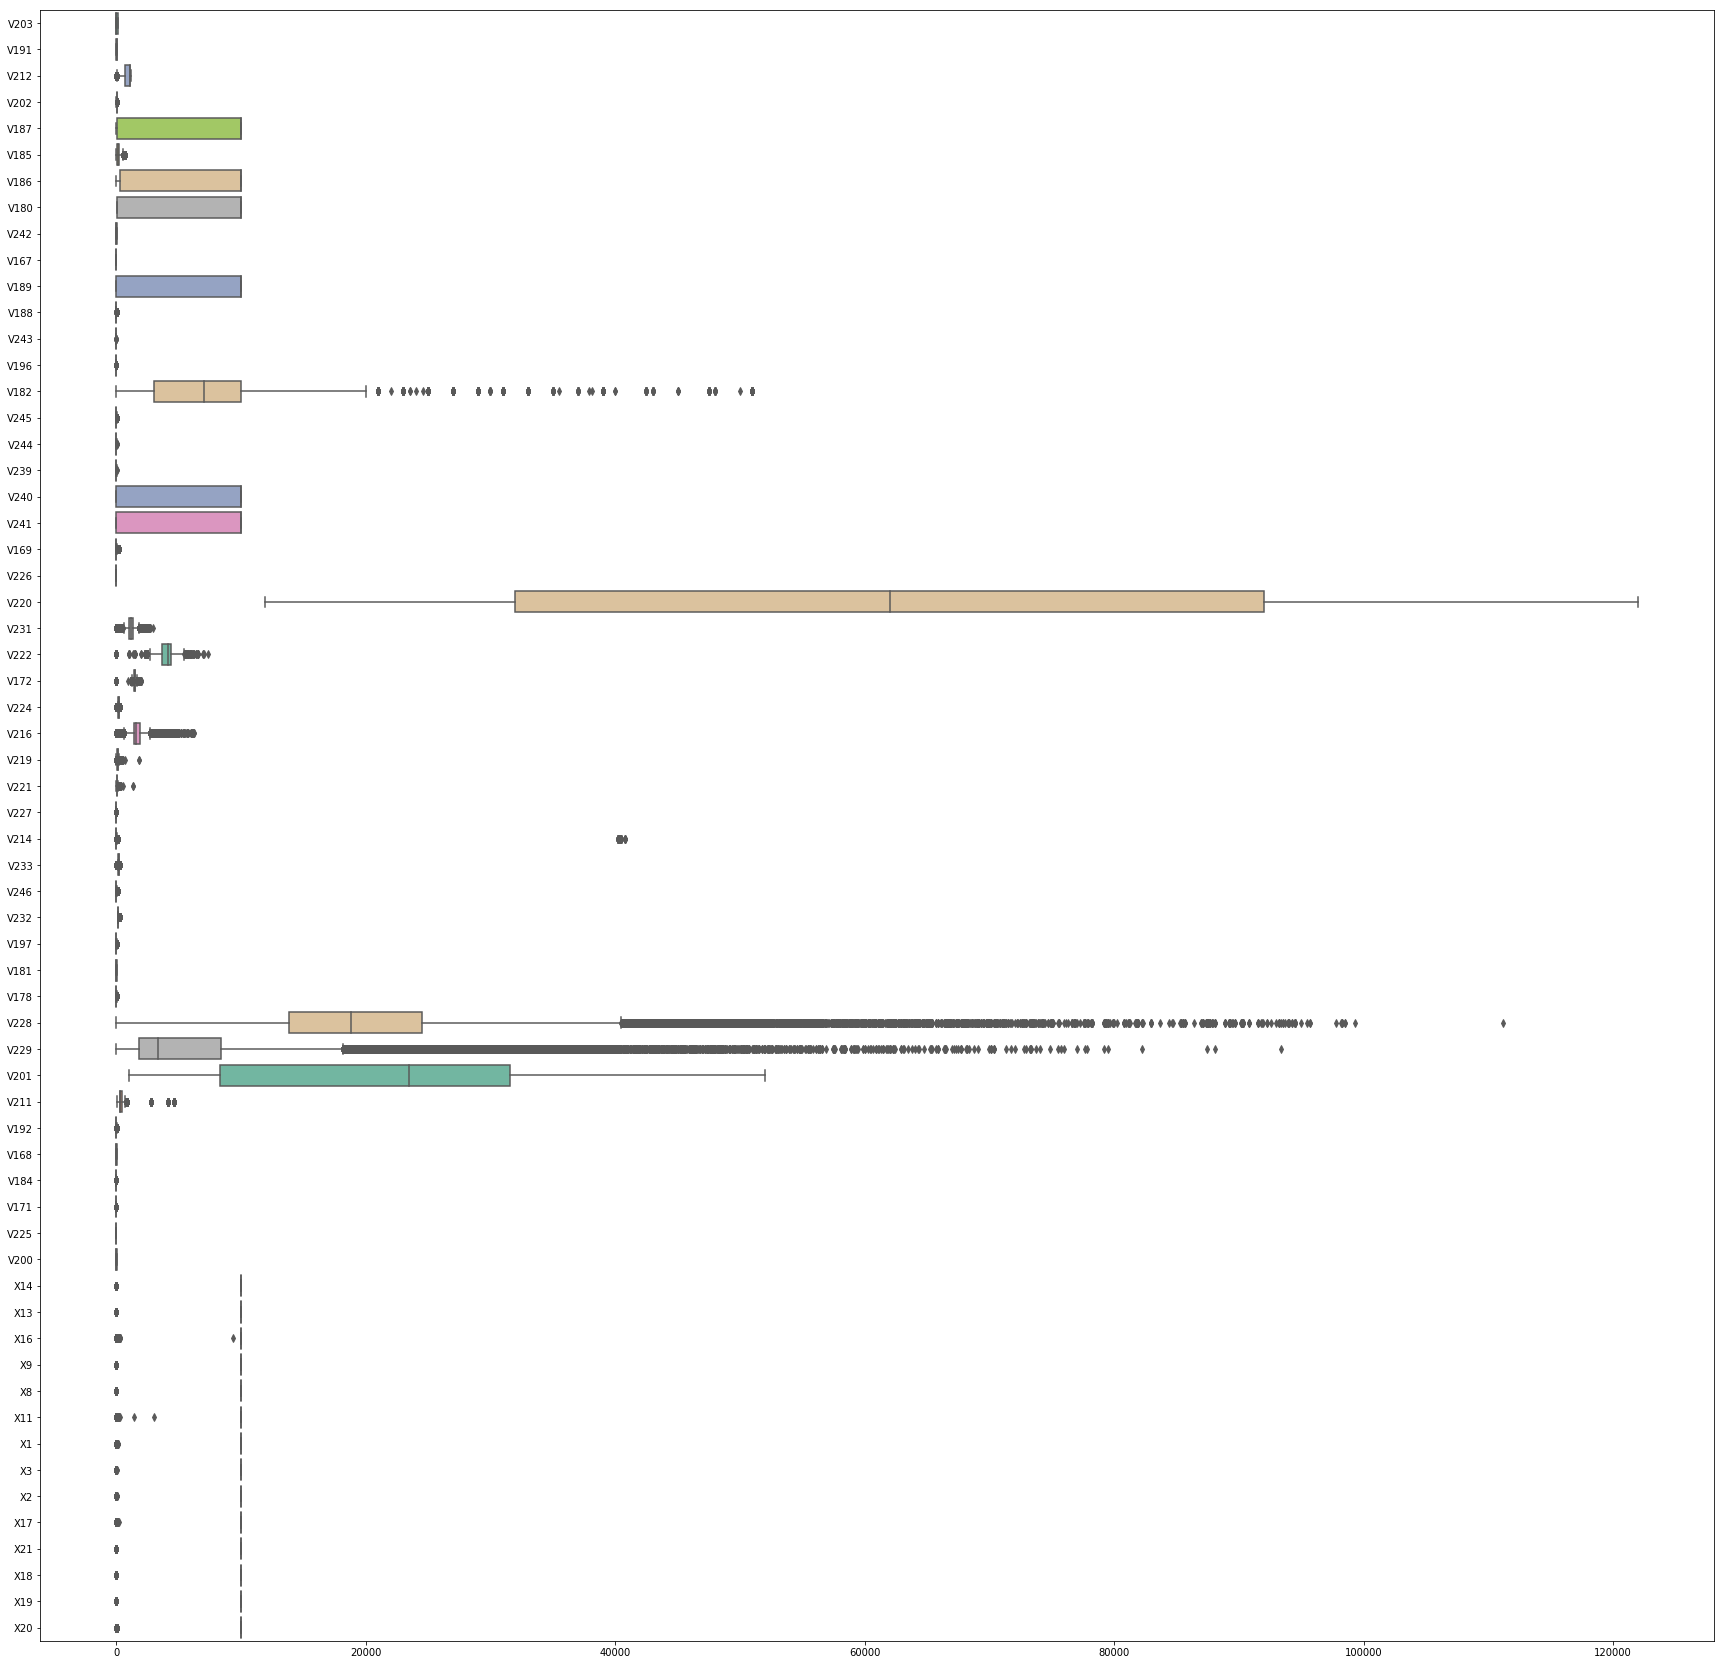

In [38]:
plt.figure(figsize=(30, 30))

ax = sns.boxplot(data=df[col_fl], orient="h", palette="Set2")

In [87]:
outl = ['V182', 'V231', 'V222', 'V172', 'V216', 'V219', 'V221', 'V214', 'V220', 'V211', 'V228']

In [88]:
down_quantiles = df_fl64[outl].quantile(0.05)
up_quantiles = df_fl64[outl].quantile(0.95)

In [89]:
pd.concat([down_quantiles, up_quantiles], axis=1)

,0.05,0.95
V182,1000.00,19000.0000
V231,166.00,1705.0000
V222,0.00,4733.0000
V172,0.00,1578.0000
V216,295.65,2495.0000
V219,22.00,190.0000
V221,0.00,138.0000
V214,0.00,15.9000
V220,12003.00,121994.0000
V211,37.00,2814.0000


In [90]:
for i in outl:
    df[i] = df[i].mask(df[i] < down_quantiles[i], down_quantiles[i])

In [91]:
for i in outl:
    df[i] = df[i].mask(df[i] > up_quantiles[i], up_quantiles[i])

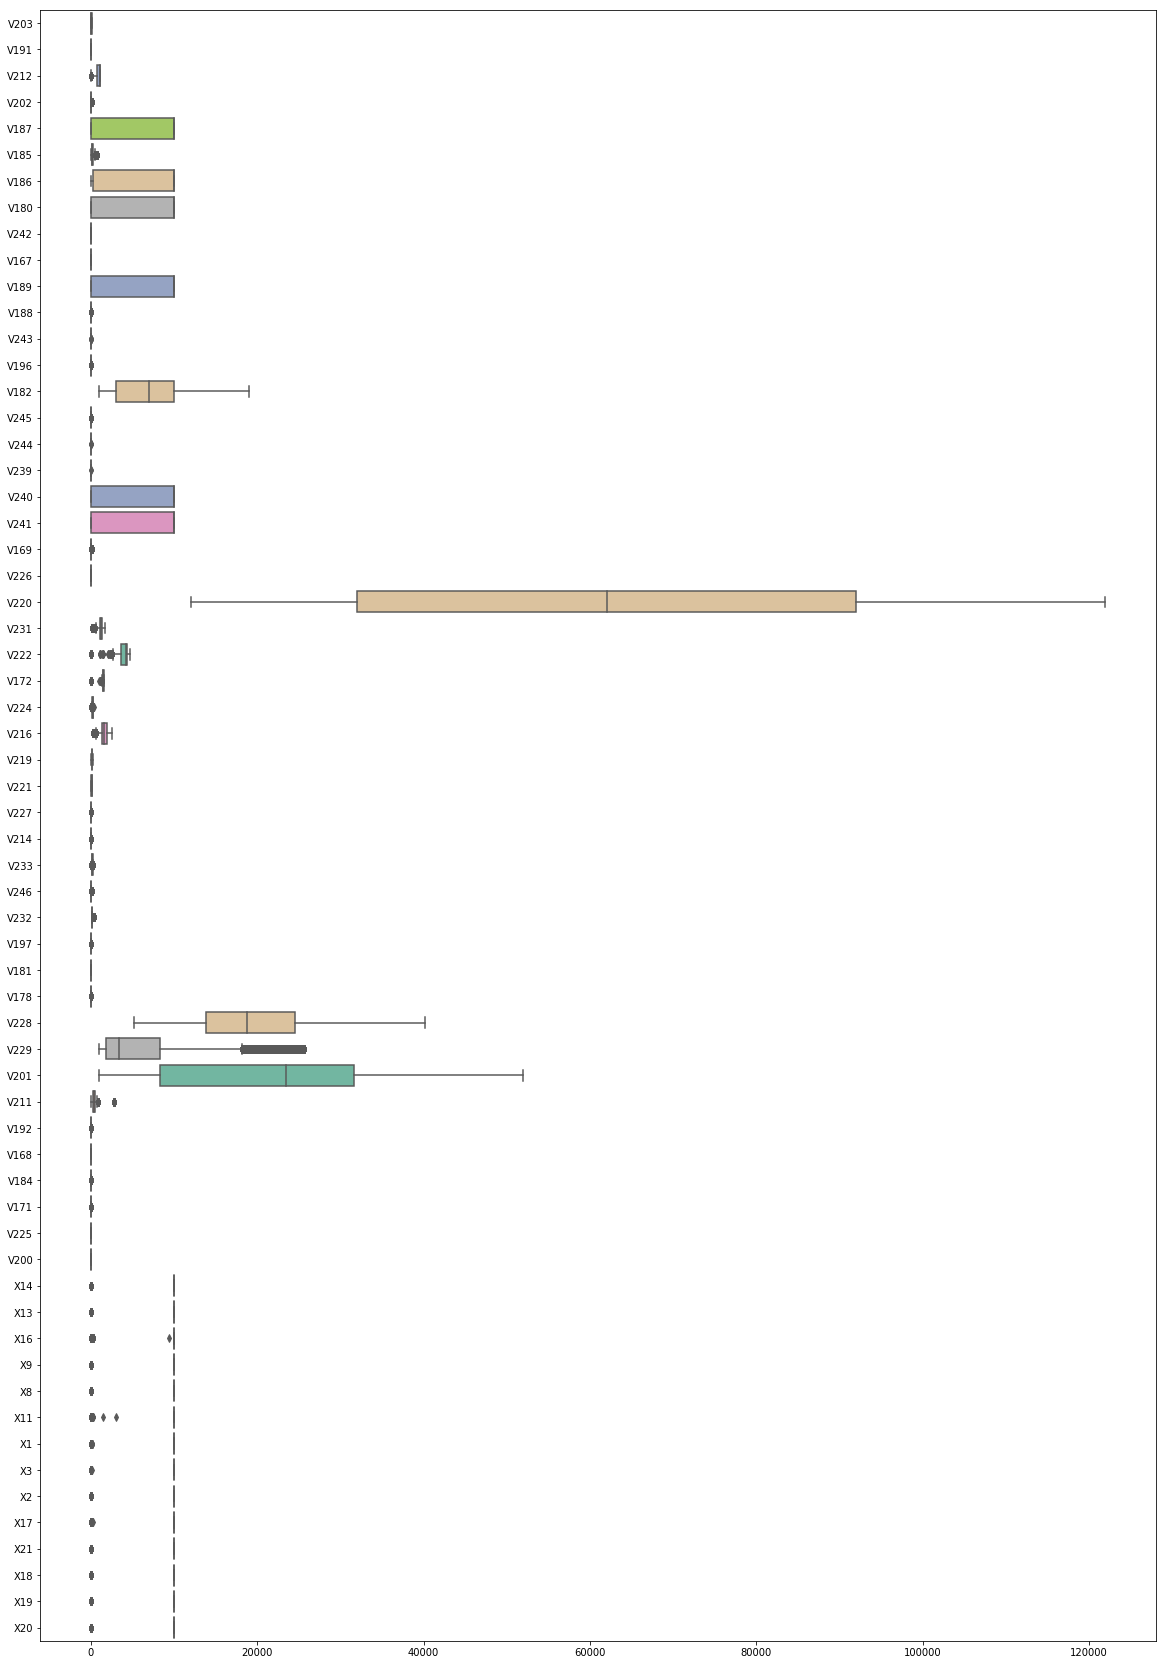

In [92]:
plt.figure(figsize=(20, 30))

ax = sns.boxplot(data=df[col_fl], orient="h", palette="Set2")

In [93]:
df.to_csv('data_exploration.csv')

In [2]:
df = pd.read_csv('data_exploration.csv', low_memory=False, index_col = 'ref')
df.head()

,V213,V208,V205,V206,V209,V183,V203,V191,V212,V210,...,X1,X3,X2,X4,X17,X21,X18,X19,X20,y
ref,,,,,,,,,,,,,,,,,,,,,
201390679,0,1,1,1,WEB,014,0.0,7.0,199.0,CO,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0
201390959,0,1,1,1,WEB,ESPA,0.0,4.0,688.0,DI,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0
201397626,11,1,1,1,AGG,ESPA,0.0,11.0,1140.0,SO,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0
201397742,11,1,1,1,WEB,ESPA,99.0,8.0,872.0,CA,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0
201401345,12,1,1,1,AGG,ESPA,0.0,8.0,1143.0,CO,...,9999.0,9999.0,9999.0,No dispone,9999.0,9999.0,9999.0,9999.0,9999.0,0


In [3]:
df_fl64 = df.loc[:, df.dtypes == np.float64]
col_fl = df_fl64.columns.values.tolist()
df_fl64.head()

,V203,V191,V212,V202,V187,V185,V186,V180,V242,V167,...,X8,X11,X1,X3,X2,X17,X21,X18,X19,X20
ref,,,,,,,,,,,,,,,,,,,,,
201390679,0.0,7.0,199.0,27.0,9999.0,113.0,9999.0,9999.0,15.0,7.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
201390959,0.0,4.0,688.0,47.0,9999.0,1.0,9999.0,9999.0,32.0,7.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
201397626,0.0,11.0,1140.0,36.0,9999.0,130.0,9999.0,9999.0,32.0,7.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
201397742,99.0,8.0,872.0,25.0,9999.0,69.0,9999.0,9999.0,28.0,3.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
201401345,0.0,8.0,1143.0,33.0,28.0,181.0,110.0,19.0,18.0,8.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [4]:
df_int = df.loc[:, df.dtypes == np.int64]
col_int = df_int.columns.values.tolist()
df_int.head()

,V213,V208,V205,V206,V179,V199,V195,V146,V147,V148,...,V149,V238,V154,V161,V234,V194,V207,V173,V174,y
ref,,,,,,,,,,,,,,,,,,,,,
201390679,0,1,1,1,18,13,13,0,0,0,...,0,1,1,0,0,4,6,0,0,0
201390959,0,1,1,1,47,0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201397626,11,1,1,1,25,0,12,0,0,0,...,0,0,0,0,1,5,0,0,0,0
201397742,11,1,1,1,20,0,14,0,0,0,...,0,0,0,0,0,0,1,0,0,0
201401345,12,1,1,1,18,11,11,0,0,0,...,0,0,0,0,0,10,9,0,0,0


In [5]:
df_obj = df.loc[:, df.dtypes == np.object]
col_obj = df_obj.columns.values.tolist()
df_obj.head()

,V209,V183,V210,V175,V176,V198,V190,V193,V204,V218,...,V215,V170,V177,V163,V164,V165,V166,X12,X7,X4
ref,,,,,,,,,,,,,,,,,,,,,
201390679,WEB,014,CO,S,No dispone,IO,D,COCINERO,AREA RESIDENCIAL,G,...,LANCIA,E0169,SI,COTIUNICA,COTIUNICA,COTIUNICA,COTIUNICA,No dispone,No dispone,No dispone
201390959,WEB,ESPA,DI,N,No dispone,IO,A,EMPLEADO TECNICO TECNICO DE LA,COM CON VIGILANCIA,D,...,RENAULT,SINA,NO,COTIUNICA,COTIUNICA,COTIUNICA,COTIUNICA,No dispone,No dispone,No dispone
201397626,AGG,ESPA,SO,N,No dispone,IO,A,EMPLEADO TECNICO TECNICO DE LA,CALLE,D,...,FORD,SINA,NO,SQRSINMULTASYSINI,OTROS,OTROS,OTROS,No dispone,No dispone,No dispone
201397742,WEB,ESPA,CA,N,No dispone,IO,A,PROFESOR,COM SIN VIGILANCIA,G,...,PEUGEOT,SINA,NO,SQRSINMULTASYSINI,OTROS,OTROS,OTROS,No dispone,No dispone,No dispone
201401345,AGG,ESPA,CO,S,S,IP,A,MANTENIMIENTO,GAR INDIVIDUAL,D,...,CITROEN,C0109,SI,SQRSINMULTASYSINI,OTROS,OTROS,OTROS,No dispone,No dispone,No dispone


In [6]:
for f in col_int:
    dist_values = df[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable V213 has 24 distinct values
Variable V208 has 12 distinct values
Variable V205 has 31 distinct values
Variable V206 has 7 distinct values
Variable V179 has 51 distinct values
Variable V199 has 21 distinct values
Variable V195 has 17 distinct values
Variable V146 has 5 distinct values
Variable V147 has 7 distinct values
Variable V148 has 6 distinct values
Variable V150 has 9 distinct values
Variable V151 has 8 distinct values
Variable V152 has 6 distinct values
Variable V235 has 7 distinct values
Variable V236 has 7 distinct values
Variable V237 has 6 distinct values
Variable V155 has 7 distinct values
Variable V156 has 8 distinct values
Variable V157 has 7 distinct values
Variable V158 has 15 distinct values
Variable V159 has 9 distinct values
Variable V160 has 7 distinct values
Variable V153 has 11 distinct values
Variable V149 has 8 distinct values
Variable V238 has 10 distinct values
Variable V154 has 11 distinct values
Variable V161 has 20 distinct values
Variable V234 has

In [7]:
for f in col_obj:
    dist_values = df[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable V209 has 3 distinct values
Variable V183 has 110 distinct values
Variable V210 has 8 distinct values
Variable V175 has 2 distinct values
Variable V176 has 3 distinct values
Variable V198 has 4 distinct values
Variable V190 has 5 distinct values
Variable V193 has 104 distinct values
Variable V204 has 8 distinct values
Variable V218 has 8 distinct values
Variable V230 has 5 distinct values
Variable V217 has 28 distinct values
Variable V223 has 1705 distinct values
Variable V215 has 138 distinct values
Variable V170 has 82 distinct values
Variable V177 has 2 distinct values
Variable V163 has 5 distinct values
Variable V164 has 5 distinct values
Variable V165 has 3 distinct values
Variable V166 has 4 distinct values
Variable X12 has 3 distinct values
Variable X7 has 3 distinct values
Variable X4 has 3 distinct values


In [8]:
sizev223 = df['V223'].value_counts()
badv223 = sizev223.index[sizev223 < 500]
badv223
df.loc[df["V223"].isin(badv223), ["V223"]] = "OTRO"
df['V223'].value_counts()

OTRO         49221
IBIZA         4199
MEGANE        3476
GOLF          3038
FOCUS         2998
LEON          2697
ASTRA         2662
CLIO          2319
CORSA         2170
SERIE 3       1994
206           1919
XSARA         1759
POLO          1618
FIESTA        1573
C4            1465
307           1417
BERLINGO      1285
C3            1179
PARTNER       1137
KANGOO         929
A4             914
A3             872
PUNTO          858
MINI           815
PASSAT         771
207            741
SERIE 1        697
LAGUNA         693
CORDOBA        683
SCENIC         677
YARIS          668
CIVIC          656
MONDEO         629
ZAFIRA         629
QASHQAI        627
TOLEDO         605
ASTRA GTC      591
308            581
MICRA          568
COROLLA        538
VECTRA         534
FABIA          512
Name: V223, dtype: int64

In [9]:
df.loc[df.V183 != 'ESPA', ['V183']] = 'OTRA' 

In [10]:
sizev193 = df['V193'].value_counts()
badv193 = sizev193.index[sizev193 < 350]
df.loc[df["V193"].isin(badv193), ["V193"]] = "OTROS"
df['V193'].value_counts()

ADMINISTRATIVO                    8058
FUNCIONARIO                       7548
OPERARIO                          5907
OTROS                             5678
DEPENDIENTE                       5365
CONDUCTOR REPARTIDOR              5002
INFORMATICA                       3914
ESTUDIANTE                        3770
DESEMPLEADO                       3756
CAMARERO                          3736
INGENIERO                         3477
MANTENIMIENTO                     3289
EMPLEADO TECNICO TECNICO DE LA    3057
PROFESOR                          2983
AMA DE CASA EMPLEADO DE HOGAR     2956
AUTONOMO                          2826
MECANICO                          2817
ALBANIL EMPLEADO CONSTRUCCION     2759
JUBILADO PENSIONISTA              2735
ENFERMERO                         2732
DIRECTIVO                         2460
EMPRESARIO                        2252
COMERCIAL                         2174
AGRICULTOR                        1919
MEDICO                            1288
POLICIA GUARDIA CIVIL    

In [11]:
sizev215 = df['V215'].value_counts()
badv215 = sizev215.index[sizev215 < 350]
df.loc[df["V215"].isin(badv215), "V215"] = "OTRA"
df['V215'].value_counts()

RENAULT          9520
SEAT             9209
PEUGEOT          8693
CITROEN          8372
OPEL             7897
FORD             7602
VOLKSWAGEN       7194
OTRA             4604
BMW              4276
AUDI             3569
NISSAN           3136
FIAT             3135
HONDA            2947
TOYOTA           2784
HYUNDAI          2613
MERCEDES         2540
KIA              2318
YAMAHA           1574
SUZUKI           1403
MAZDA            1097
SKODA            1020
CHEVROLET GM      982
PIAGGIO VESPA     883
MINI              875
ALFA ROMEO        828
DACIA             785
VOLVO             735
KYMCO             726
KAWASAKI          680
MITSUBISHI        619
DAEWOO            492
SMART             415
LAND ROVER        391
Name: V215, dtype: int64

In [12]:
sizev170 = df['V170'].value_counts()
badv170 = sizev170.index[sizev170 < 350]
df.loc[df["V170"].isin(badv170), "V170"] = "OTRA"
df['V170'].value_counts()

SINA     46548
C0720    10166
E0169     6815
M0083     5873
C0058     4694
C0730     4118
OTRA      3197
C0109     2783
C0695     2141
C0706     2099
C0723     2047
C0785     1916
C0072     1882
M0050     1514
C0467     1330
00000     1019
C0613      868
C0124      741
E0189      688
C0624      603
C0031      537
L0376      520
C0517      514
C0468      474
L0375      426
C0708      401
Name: V170, dtype: int64

In [13]:
sizev217 = df['V217'].value_counts()
badv217 = sizev217.index[sizev217 < 350]
df.loc[df["V217"].isin(badv217), "V217"] = "OTRA"
df.V217.value_counts()

PO      52741
BE       9316
MV       8721
TR       7983
FA       5668
TU       4844
CO       2899
3H       2897
CA       1818
OTRA     1487
3K       1418
3F       1394
3S       1356
FU        533
3L        432
3C        407
Name: V217, dtype: int64

In [14]:
sizev210 = df['V210'].value_counts()
badv210 = sizev210.index[sizev210 < 600]
df.loc[df["V210"].isin(badv210), "V210"] = "OTRA"
df.V210.value_counts()

CA      45235
SO      38757
CO       9608
PH       7474
DI       2007
OTRA      833
Name: V210, dtype: int64

In [15]:
sizev204 = df['V204'].value_counts()
badv204 = sizev204.index[sizev204 < 50]
df.loc[df["V204"].isin(badv204), "V204"] = "OTROS"
df.V204.value_counts()

GAR INDIVIDUAL        35570
COM SIN VIGILANCIA    32814
CALLE                 27078
COM CON VIGILANCIA     6583
AREA RESIDENCIAL       1455
PARKING PUBLICO         325
OTROS                    89
Name: V204, dtype: int64

In [16]:
sizev218 = df['V218'].value_counts()
badv218 = sizev218.index[sizev218 < 50]
df.loc[df["V218"].isin(badv218), "V218"] = "OTRA"
df.V218.value_counts()

D       55225
G       47990
X         572
E          71
OTRA       56
Name: V218, dtype: int64

In [17]:
for f in col_obj:
    dist_values = df[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable V209 has 3 distinct values
Variable V183 has 2 distinct values
Variable V210 has 6 distinct values
Variable V175 has 2 distinct values
Variable V176 has 3 distinct values
Variable V198 has 4 distinct values
Variable V190 has 5 distinct values
Variable V193 has 42 distinct values
Variable V204 has 7 distinct values
Variable V218 has 5 distinct values
Variable V230 has 5 distinct values
Variable V217 has 16 distinct values
Variable V223 has 42 distinct values
Variable V215 has 33 distinct values
Variable V170 has 26 distinct values
Variable V177 has 2 distinct values
Variable V163 has 5 distinct values
Variable V164 has 5 distinct values
Variable V165 has 3 distinct values
Variable V166 has 4 distinct values
Variable X12 has 3 distinct values
Variable X7 has 3 distinct values
Variable X4 has 3 distinct values


In [18]:
for f in col_fl:
    dist_values = df[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable V203 has 2 distinct values
Variable V191 has 52 distinct values
Variable V212 has 803 distinct values
Variable V202 has 65 distinct values
Variable V187 has 65 distinct values
Variable V185 has 697 distinct values
Variable V186 has 662 distinct values
Variable V180 has 48 distinct values
Variable V242 has 33 distinct values
Variable V167 has 8 distinct values
Variable V189 has 6 distinct values
Variable V188 has 14 distinct values
Variable V243 has 13 distinct values
Variable V196 has 7 distinct values
Variable V182 has 109 distinct values
Variable V245 has 28 distinct values
Variable V244 has 31 distinct values
Variable V239 has 28 distinct values
Variable V240 has 55 distinct values
Variable V241 has 55 distinct values
Variable V169 has 180 distinct values
Variable V226 has 6 distinct values
Variable V220 has 350 distinct values
Variable V231 has 972 distinct values
Variable V222 has 734 distinct values
Variable V172 has 259 distinct values
Variable V224 has 27 distinct valu

In [19]:
bins = [18, 25, 30, 40, 50, 60, 99, 9999]
names = ['1', '2', '3', '4', '5', '6', '9999']
df['V180'] = pd.cut(df['V180'], bins, labels = names)

In [20]:
bins1 = [0, 5, 10, 20, 30, 40, 55, 9999]
#names = ['1', '2', '3', '4', '5', '6', '9999']
df['V241'] = pd.cut(df['V241'], bins1, labels = names)
df['V241'].value_counts()

9999    71243
1       19260
2        4375
4        2210
3        1490
5        1432
6          74
Name: V241, dtype: int64

In [21]:
sizex11 = df.X11.value_counts()
badx11 = sizex11.index[sizex11 < 24000]
df.loc[df["X11"].isin(badx11), "X11"] = 1   # 1 = Mayor que 0

In [22]:
df.X11.value_counts()

9999.0    79848
0.0       24009
1.0          57
Name: X11, dtype: int64

In [23]:
bins2 = [0, 1041, 1146]
names2 = ['0', '1']
df['V212'] = pd.cut(df['V212'], bins2, labels = names2)
df['V212'].value_counts()

1    71816
0    32098
Name: V212, dtype: int64

In [24]:
df_obj = df.loc[:, df.dtypes == np.object]
col_obj = df_obj.columns.values.tolist()
df_obj.head()

,V209,V183,V210,V175,V176,V198,V190,V193,V204,V218,...,V215,V170,V177,V163,V164,V165,V166,X12,X7,X4
ref,,,,,,,,,,,,,,,,,,,,,
201390679,WEB,OTRA,CO,S,No dispone,IO,D,COCINERO,AREA RESIDENCIAL,G,...,OTRA,E0169,SI,COTIUNICA,COTIUNICA,COTIUNICA,COTIUNICA,No dispone,No dispone,No dispone
201390959,WEB,ESPA,DI,N,No dispone,IO,A,EMPLEADO TECNICO TECNICO DE LA,COM CON VIGILANCIA,D,...,RENAULT,SINA,NO,COTIUNICA,COTIUNICA,COTIUNICA,COTIUNICA,No dispone,No dispone,No dispone
201397626,AGG,ESPA,SO,N,No dispone,IO,A,EMPLEADO TECNICO TECNICO DE LA,CALLE,D,...,FORD,SINA,NO,SQRSINMULTASYSINI,OTROS,OTROS,OTROS,No dispone,No dispone,No dispone
201397742,WEB,ESPA,CA,N,No dispone,IO,A,PROFESOR,COM SIN VIGILANCIA,G,...,PEUGEOT,SINA,NO,SQRSINMULTASYSINI,OTROS,OTROS,OTROS,No dispone,No dispone,No dispone
201401345,AGG,ESPA,CO,S,S,IP,A,MANTENIMIENTO,GAR INDIVIDUAL,D,...,CITROEN,C0109,SI,SQRSINMULTASYSINI,OTROS,OTROS,OTROS,No dispone,No dispone,No dispone


In [25]:
df_obj2 = df_obj.copy()

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in col_obj:
    le.fit(df_obj2[i])
    #list(le.classes_)
    df_obj2[i] = le.transform(df_obj2[i])
    

In [27]:
col_lenc = []
for i in col_obj:
    col_lenc.append(i+'_encoded')
#col_lenc
df_obj2.rename(columns=dict(zip(col_obj, col_lenc)), inplace=True)

In [28]:
df_obj2.head()

,V209_encoded,V183_encoded,V210_encoded,V175_encoded,V176_encoded,V198_encoded,V190_encoded,V193_encoded,V204_encoded,V218_encoded,...,V215_encoded,V170_encoded,V177_encoded,V163_encoded,V164_encoded,V165_encoded,V166_encoded,X12_encoded,X7_encoded,X4_encoded
ref,,,,,,,,,,,,,,,,,,,,,
201390679,2,1,1,1,1,0,3,10,0,2,...,21,18,1,0,0,0,0,1,1,1
201390959,2,0,2,0,1,0,0,19,2,0,...,24,25,0,0,0,0,0,1,1,1
201397626,0,0,5,0,1,0,0,19,1,0,...,8,25,0,4,4,2,2,1,1,1
201397742,2,0,0,0,1,0,0,39,3,2,...,22,25,0,4,4,2,2,1,1,1
201401345,0,0,1,1,2,1,0,32,4,0,...,4,4,1,4,4,2,2,1,1,1


In [36]:
df2 = pd.DataFrame()
df2 = pd.concat([df_fl64, df_obj2, df_int], axis = 1)
df2.head()

,V203,V191,V212,V202,V187,V185,V186,V180,V242,V167,...,V149,V238,V154,V161,V234,V194,V207,V173,V174,y
ref,,,,,,,,,,,,,,,,,,,,,
201390679,0.0,7.0,199.0,27.0,9999.0,113.0,9999.0,9999.0,15.0,7.0,...,0,1,1,0,0,4,6,0,0,0
201390959,0.0,4.0,688.0,47.0,9999.0,1.0,9999.0,9999.0,32.0,7.0,...,0,0,0,0,0,0,0,0,0,0
201397626,0.0,11.0,1140.0,36.0,9999.0,130.0,9999.0,9999.0,32.0,7.0,...,0,0,0,0,1,5,0,0,0,0
201397742,99.0,8.0,872.0,25.0,9999.0,69.0,9999.0,9999.0,28.0,3.0,...,0,0,0,0,0,0,1,0,0,0
201401345,0.0,8.0,1143.0,33.0,28.0,181.0,110.0,19.0,18.0,8.0,...,0,0,0,0,0,10,9,0,0,0


In [37]:
df2.to_csv('data_exploration_2.csv')

One Hot Encoder no lo hemos podido aplicar por las limitaciones de la máquina. A partir de aquí pasamos al siguiente script donde blancearemos los datos, seleccionaremos las variables e implementaremos los modelos.

In [29]:
df_ohe = df_obj2.copy()

In [30]:
df_ohe.head()

,V209_encoded,V183_encoded,V210_encoded,V175_encoded,V176_encoded,V198_encoded,V190_encoded,V193_encoded,V204_encoded,V218_encoded,...,V215_encoded,V170_encoded,V177_encoded,V163_encoded,V164_encoded,V165_encoded,V166_encoded,X12_encoded,X7_encoded,X4_encoded
ref,,,,,,,,,,,,,,,,,,,,,
201390679,2,1,1,1,1,0,3,10,0,2,...,21,18,1,0,0,0,0,1,1,1
201390959,2,0,2,0,1,0,0,19,2,0,...,24,25,0,0,0,0,0,1,1,1
201397626,0,0,5,0,1,0,0,19,1,0,...,8,25,0,4,4,2,2,1,1,1
201397742,2,0,0,0,1,0,0,39,3,2,...,22,25,0,4,4,2,2,1,1,1
201401345,0,0,1,1,2,1,0,32,4,0,...,4,4,1,4,4,2,2,1,1,1


In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df_OHE = pd.DataFrame()
for i in col_lenc:
    #ohe.fit(df[i])
    OH = ohe.fit_transform(df_ohe[i].values.reshape(-1,1)).toarray()
    X = pd.DataFrame(OH, columns = [i[:-7]+"ohe_"+str(int(j)) for j in range(OH.shape[1])])
    df_OHE = pd.concat([df_OHE, X], axis = 1)

In [32]:
df_OHE.head()

,V209_ohe_0,V209_ohe_1,V209_ohe_2,V183_ohe_0,V183_ohe_1,V210_ohe_0,V210_ohe_1,V210_ohe_2,V210_ohe_3,V210_ohe_4,...,V166_ohe_3,X12_ohe_0,X12_ohe_1,X12_ohe_2,X7_ohe_0,X7_ohe_1,X7_ohe_2,X4_ohe_0,X4_ohe_1,X4_ohe_2
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [33]:
df2 = pd.DataFrame()
df2 = pd.concat([df_fl64, df_int, df_OHE], axis = 1)
df2.head()

MemoryError: 